In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', encoding = 'ISO-8859-1', usecols = ['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006', 'Q024', 'Q025'])

In [9]:
dataset

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,190001004627,Santarém,PA,21,M,1,3,3,1,NaN,...,369.1,0,1.0,780.0,D,E,7,B,B,A
1,190001004628,Mãe do Rio,PA,16,F,1,3,0,1,NaN,...,416.5,1,1.0,600.0,D,E,5,B,A,A
2,190001004629,Paragominas,PA,18,F,1,1,0,3,1.0,...,571.5,0,1.0,640.0,H,E,3,C,C,B
5,190001004632,Ananindeua,PA,31,M,1,1,7,1,1.0,...,605.3,1,1.0,580.0,C,C,5,C,A,A
6,190001004633,Marabá,PA,30,F,2,3,10,1,1.0,...,581.5,1,1.0,360.0,B,B,4,C,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,190006129585,Salvador,BA,27,F,0,2,5,1,1.0,...,488.5,0,1.0,280.0,H,D,3,B,B,B
5095262,190006129586,Santo Amaro,BA,22,F,2,2,4,1,1.0,...,504.7,1,1.0,400.0,E,C,7,C,B,B
5095263,190006129587,Cansanção,BA,32,M,0,3,13,1,1.0,...,552.0,0,1.0,580.0,B,A,2,C,B,B
5095268,190006129592,Salvador,BA,16,M,1,1,0,1,NaN,...,396.7,0,1.0,800.0,G,G,6,I,B,B


In [10]:
# Normalização redução do total de campos dos atributos Q001 e Q002.

In [11]:
dataset.Q001.value_counts()

E    1006869
B     753010
C     516098
D     433451
F     308527
H     306390
G     193652
A     186305
Name: Q001, dtype: int64

In [12]:
dataset.Q001[(dataset.Q001=='A') | (dataset.Q001 == 'B') | (dataset.Q001 == 'C') | (dataset.Q001 == 'D') | (dataset.Q001 == 'H')] = 0
dataset.Q001[(dataset.Q001=='E')] = 1
dataset.Q001[(dataset.Q001=='F') | (dataset.Q001 == 'G')] = 2


<ipython-input-12-30fc9a888a74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q001[(dataset.Q001=='A') | (dataset.Q001 == 'B') | (dataset.Q001 == 'C') | (dataset.Q001 == 'D') | (dataset.Q001 == 'H')] = 0
<ipython-input-12-30fc9a888a74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q001[(dataset.Q001=='E')] = 1
<ipython-input-12-30fc9a888a74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q001[(dataset.Q0

In [13]:
dataset.Q002.value_counts()

E    1235589
B     551834
D     476080
C     472086
F     416543
G     333368
A     121101
H      97701
Name: Q002, dtype: int64

In [14]:
dataset.Q002[(dataset.Q002=='A') | (dataset.Q002 == 'B') | (dataset.Q002 == 'C') | (dataset.Q002 == 'D') | (dataset.Q002 == 'H')] = 0
dataset.Q002[(dataset.Q002=='E')] = 1
dataset.Q002[(dataset.Q002=='F') | (dataset.Q002 == 'G')] = 2

<ipython-input-14-5291959905a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q002[(dataset.Q002=='A') | (dataset.Q002 == 'B') | (dataset.Q002 == 'C') | (dataset.Q002 == 'D') | (dataset.Q002 == 'H')] = 0
<ipython-input-14-5291959905a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q002[(dataset.Q002=='E')] = 1
<ipython-input-14-5291959905a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q002[(dataset.Q0

In [15]:
# Normalização redução do total de campos dos atributos Q006

In [16]:
dataset.Q006.value_counts()

C    905600
B    892860
D    357120
E    346219
G    234448
F    172295
A    158183
H    154868
I    118014
J     66802
N     51673
K     48554
Q     46689
O     41937
L     36818
M     36119
P     36103
Name: Q006, dtype: int64

In [17]:
dataset.Q006[(dataset.Q006=='A') | (dataset.Q006 == 'B')] = 0
dataset.Q006[(dataset.Q006=='C')] = 1

<ipython-input-17-491edf81fdb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q006[(dataset.Q006=='A') | (dataset.Q006 == 'B')] = 0
<ipython-input-17-491edf81fdb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q006[(dataset.Q006=='C')] = 1


In [18]:
dataset.Q006[(dataset.Q006 !=0) & (dataset.Q006 !=1)] = 2

<ipython-input-18-5372537c6e3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q006[(dataset.Q006 !=0) & (dataset.Q006 !=1)] = 2


In [19]:
dataset.Q006.value_counts()

2    1747659
0    1051043
1     905600
Name: Q006, dtype: int64

In [20]:
# Normalização redução do total de campos dos atributos Q024

In [21]:
dataset.Q024.value_counts()

B    1637827
A    1623542
C     308802
D      94746
E      39385
Name: Q024, dtype: int64

In [22]:
dataset.Q024[(dataset.Q024=='A')] = 0
dataset.Q024[(dataset.Q024 !=0)] = 1

<ipython-input-22-4a4cf4e7351d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q024[(dataset.Q024=='A')] = 0
<ipython-input-22-4a4cf4e7351d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q024[(dataset.Q024 !=0)] = 1


In [23]:
dataset.Q024.value_counts()

1    2080760
0    1623542
Name: Q024, dtype: int64

In [24]:
# Normalização redução do total de campos dos atributos Q025

In [25]:
dataset.Q025.value_counts()

B    2921844
A     782458
Name: Q025, dtype: int64

In [26]:
dataset.Q025[(dataset.Q025=='A')] = 0
dataset.Q025[(dataset.Q025 !=0)] = 1

<ipython-input-26-6b231ff843d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q025[(dataset.Q025=='A')] = 0
<ipython-input-26-6b231ff843d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Q025[(dataset.Q025 !=0)] = 1


In [27]:
dataset.Q025.value_counts()

1    2921844
0     782458
Name: Q025, dtype: int64

In [28]:
#Criacao do atribudo media geral

In [29]:
dataset['MEDIA_GERAL'] = (dataset['NU_NOTA_CN'] +dataset['NU_NOTA_CH'] + dataset['NU_NOTA_LC'] + dataset['NU_NOTA_MT'] + dataset['NU_NOTA_REDACAO']) /5

In [30]:
#plots iniciais 

In [31]:
#total de candidatos em funcao da media geral dos candidatos 

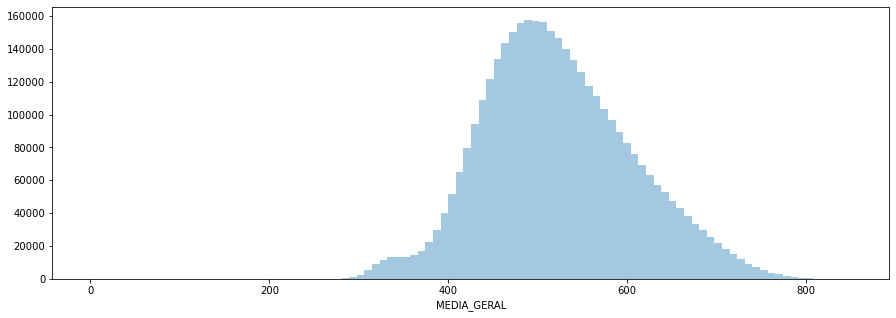

In [32]:
plt.figure(figsize=(15,5))
sns.distplot(dataset['MEDIA_GERAL'], kde=False, bins=100)

In [33]:
#Medai dos canditos por estados 

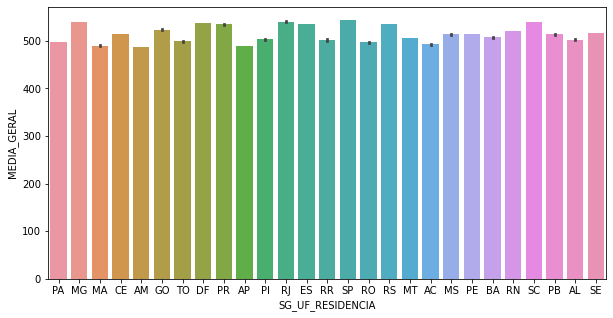

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='SG_UF_RESIDENCIA', y='MEDIA_GERAL', data=dataset)

In [35]:
corr = dataset.corr()

In [36]:
corr

,NU_INSCRICAO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,...,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005,MEDIA_GERAL
NU_INSCRICAO,1.000000,0.065109,0.029172,-0.063934,0.070456,-0.099383,0.005823,0.112946,0.096847,0.012063,...,0.002403,0.013755,-0.003625,-0.002510,0.025334,-0.027128,0.018577,-0.072962,-0.027227,-0.023811
NU_IDADE,0.065109,1.000000,0.382702,0.062368,0.792455,-0.304268,0.048138,-0.277742,-0.081911,0.006589,...,0.002428,-0.056520,-0.028444,-0.084006,-0.139279,0.149166,0.049111,-0.168458,-0.122186,-0.138191
TP_ESTADO_CIVIL,0.029172,0.382702,1.000000,0.029462,0.291094,-0.100072,0.019006,-0.073810,-0.020280,0.000171,...,0.000628,-0.033083,-0.022075,-0.039410,-0.056469,0.060082,0.018696,-0.067074,-0.063315,-0.060176
TP_COR_RACA,-0.063934,0.062368,0.029462,1.000000,0.057424,-0.067901,0.004639,-0.071031,-0.171665,0.033318,...,0.000606,-0.191134,-0.191031,-0.197530,-0.196937,0.148959,0.032538,-0.128636,0.090126,-0.208862
TP_ANO_CONCLUIU,0.070456,0.792455,0.291094,0.057424,1.000000,-0.420022,0.014299,-0.262840,NaN,NaN,...,0.000508,0.018839,0.050193,0.019683,-0.051433,0.133303,-0.007689,-0.070758,-0.133623,-0.028193
TP_ESCOLA,-0.099383,-0.304268,-0.100072,-0.067901,-0.420022,1.000000,-0.013584,-0.265679,0.813962,-0.060556,...,-0.001749,0.052100,0.042164,0.036561,0.088091,-0.090911,-0.000876,0.086960,0.049278,0.084040
TP_ENSINO,0.005823,0.048138,0.019006,0.004639,0.014299,-0.013584,1.000000,NaN,-0.007275,-0.002084,...,0.000988,-0.012077,-0.011739,-0.013987,-0.016198,0.006764,0.007370,-0.023081,-0.003942,-0.021146
IN_TREINEIRO,0.112946,-0.277742,-0.073810,-0.071031,-0.262840,-0.265679,NaN,1.000000,NaN,NaN,...,0.000059,0.028740,0.012472,0.022679,0.055735,-0.113091,0.020683,-0.005905,0.013712,0.022981
TP_DEPENDENCIA_ADM_ESC,0.096847,-0.081911,-0.020280,-0.171665,NaN,0.813962,-0.007275,NaN,1.000000,-0.084733,...,-0.002120,0.342449,0.302618,0.283558,0.348022,-0.158265,-0.051693,0.283559,-0.081316,0.372227
TP_LOCALIZACAO_ESC,0.012063,0.006589,0.000171,0.033318,NaN,-0.060556,-0.002084,NaN,-0.084733,1.000000,...,-0.000353,-0.040993,-0.052932,-0.070462,-0.046627,0.058790,0.018878,-0.046284,0.033424,-0.059851


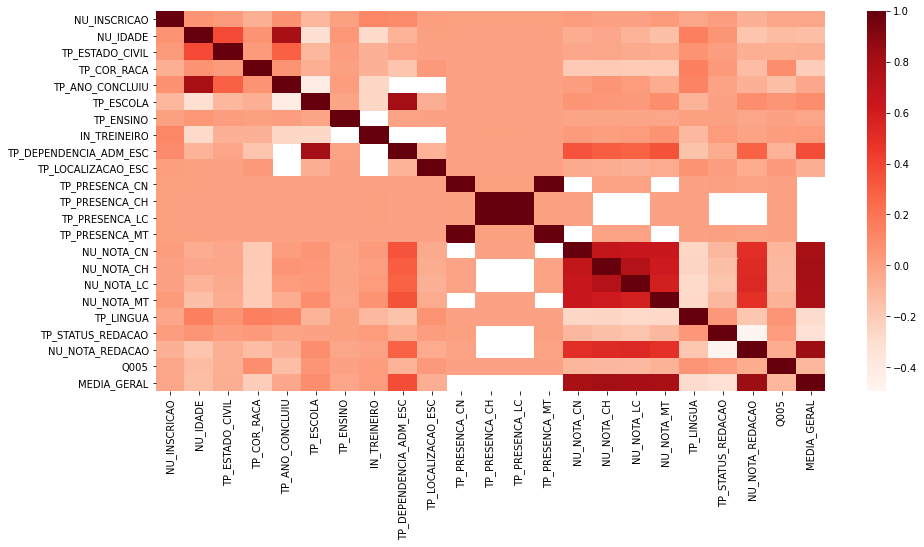

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cmap='Reds')